## 📊 Exploratory Data Analysis (EDA)

This section is used to **explore and understand the dataset** before modeling. The following libraries are imported:

- `numpy` → for numerical computations and handling arrays efficiently.  
- `pandas` → for loading, manipulating, and analyzing tabular data (DataFrames).  
- `matplotlib.pyplot` → for creating basic plots and visualizations.  
- `seaborn` → for advanced statistical visualizations with beautiful styles and color palettes.

Using these libraries, we can **summarize data, detect missing values, visualize distributions, and identify patterns** that are important for model building.

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset
This line loads the CSV file `'Multiclass Diabetes Dataset.csv'` into a Pandas DataFrame called `df`, which allows us to easily view, manipulate and analyze the data in Python.

In [22]:
# Loading dataset
df = pd.read_csv('Multiclass Diabetes Dataset.csv')

## 🗂️ Dataset Shape & Preview

Before analysis, it is important to **understand the size and structure of the dataset**:

- `df.shape` → shows the **number of rows and columns** in the dataset, providing insight into its scale.  
- `df.head()` → displays the **first 5 rows** of the dataset, offering a quick preview of the features and sample values.

This step helps to **know the data** and plan preprocessing and analysis accordingly.
   

In [23]:
# Dataset shape & preview
print(df.shape)
print(df.head())

(264, 12)
   Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  Class
0       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0      0
1       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0      0
2       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0      0
3       0   45   2.3  24    4.0   2.9  1.0  1.0  1.5   0.4  21.0      0
4       0   50   2.0  50    4.0   3.6  1.3  0.9  2.1   0.6  24.0      0


## ℹ️ Dataset Information

The `df.info()` function provides a **summary of the dataset**, including:

- **Column names** and **data types** (int, float, object, etc.)  
- **Number of non-null entries** in each column  
- **Memory usage** of the dataset  

This helps to **identify missing values** and understand the **type of data** for preprocessing and modeling.

In [24]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


## 🔢 Unique Values in Each Column

The `df.nunique()` function shows the **number of unique values** in each column of the dataset.  

- Useful for **understanding categorical variables** and their cardinality.  
- Helps in deciding **encoding techniques** for machine learning models.  
- Can reveal **columns with constant values** that may not be useful for modeling.

In [25]:
# Unique values
print(df.nunique())

Gender     2
AGE       42
Urea      83
Cr        90
HbA1c     74
Chol      57
TG        45
HDL       25
LDL       45
VLDL      33
BMI       38
Class      3
dtype: int64


## 🏷️ Column Names in the Dataset

The `df.columns` attribute lists all the **column names** in the dataset.  

- Helps in **identifying features and target variables**.  
- Useful for **selecting, renaming, or dropping columns** during preprocessing.  
- Provides a quick overview of the dataset structure.

In [26]:
# Columns
print(df.columns)

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'Class'],
      dtype='object')


## 📊 Dataset Statistical Summary

The `df.describe()` function provides a **statistical summary** of all numeric columns:

- **count**: Number of non-missing values in each column  
- **mean**: Average value  
- **std**: Standard deviation (measure of spread)  
- **min / max**: Minimum and maximum values  
- **25%, 50%, 75%**: Quartiles (useful for understanding distribution)  

This helps in **understanding data distribution, detecting outliers, and planning preprocessing steps**.

In [27]:
# Summary statistics
print(df.describe())

           Gender         AGE        Urea          Cr       HbA1c        Chol  \
count  264.000000  264.000000  264.000000  264.000000  264.000000  264.000000   
mean     0.545455   49.522727    5.671515   85.806818    6.862727    4.594394   
std      0.498875   10.127301    4.002837   99.400047    2.544604    1.289062   
min      0.000000   25.000000    1.100000    6.000000    0.900000    0.000000   
25%      0.000000   43.000000    3.600000   46.000000    5.000000    3.875000   
50%      1.000000   50.000000    4.700000   61.000000    6.100000    4.500000   
75%      1.000000   55.250000    6.100000   82.250000    8.200000    5.300000   
max      1.000000   77.000000   26.400000  800.000000   14.600000    9.500000   

               TG         HDL         LDL        VLDL         BMI       Class  
count  264.000000  264.000000  264.000000  264.000000  264.000000  264.000000  
mean     2.151894    1.182879    2.530871    1.479167   26.626856    1.121212  
std      1.265841    0.455591 

## 📊 Class Distribution

The `df['Class'].value_counts()` function shows the **number of samples in each class**:

- Helps identify **class imbalance**.  
- Useful for deciding if **resampling techniques** (like SMOTE or undersampling) are needed.  

In [28]:
# Class distribution
print(df['Class'].value_counts())

Class
2    128
0     96
1     40
Name: count, dtype: int64


## 🔍 Check for Duplicates

The `df.duplicated().sum()` function counts the **number of duplicate rows** in the dataset.  

- Ensures the dataset **does not contain repeated entries** that could bias the model.  
- If duplicates exist, they can be removed using `df.drop_duplicates()`.  

In [29]:
# Check duplicates
print(df.duplicated().sum())

0


## 🔍 Check for Missing Values

The `df.isnull().sum()` function calculates the **total number of missing values** in each column of the dataset.  

- Helps identify **features with incomplete data** that may require imputation or removal.  
- Ensures that the model receives **clean and complete data** for training. 

In [30]:
# Check missing values
print(df.isnull().sum())

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
Class     0
dtype: int64


## 📊 Class Distribution Visualization

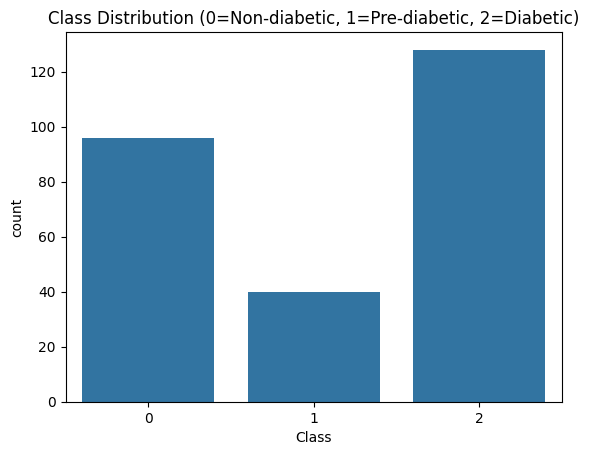

In [31]:
# Visualizations: Class distribution
sns.countplot(x="Class", data=df)
plt.title("Class Distribution (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic)")
plt.show()

The `sns.countplot()` function is used to **visualize the distribution of the target classes** in the dataset.  

- **X-axis**: Represents the `Class` column (0 = Non-diabetic, 1 = Pre-diabetic, 2 = Diabetic).  
- **Y-axis**: Shows the **number of samples** in each class.  
- Helps identify **class imbalance**, which is important for model training.  

Example observation:  
- If one class has significantly fewer samples, **techniques like SMOTE** can be applied to balance the dataset.

## 📊 Feature Distributions

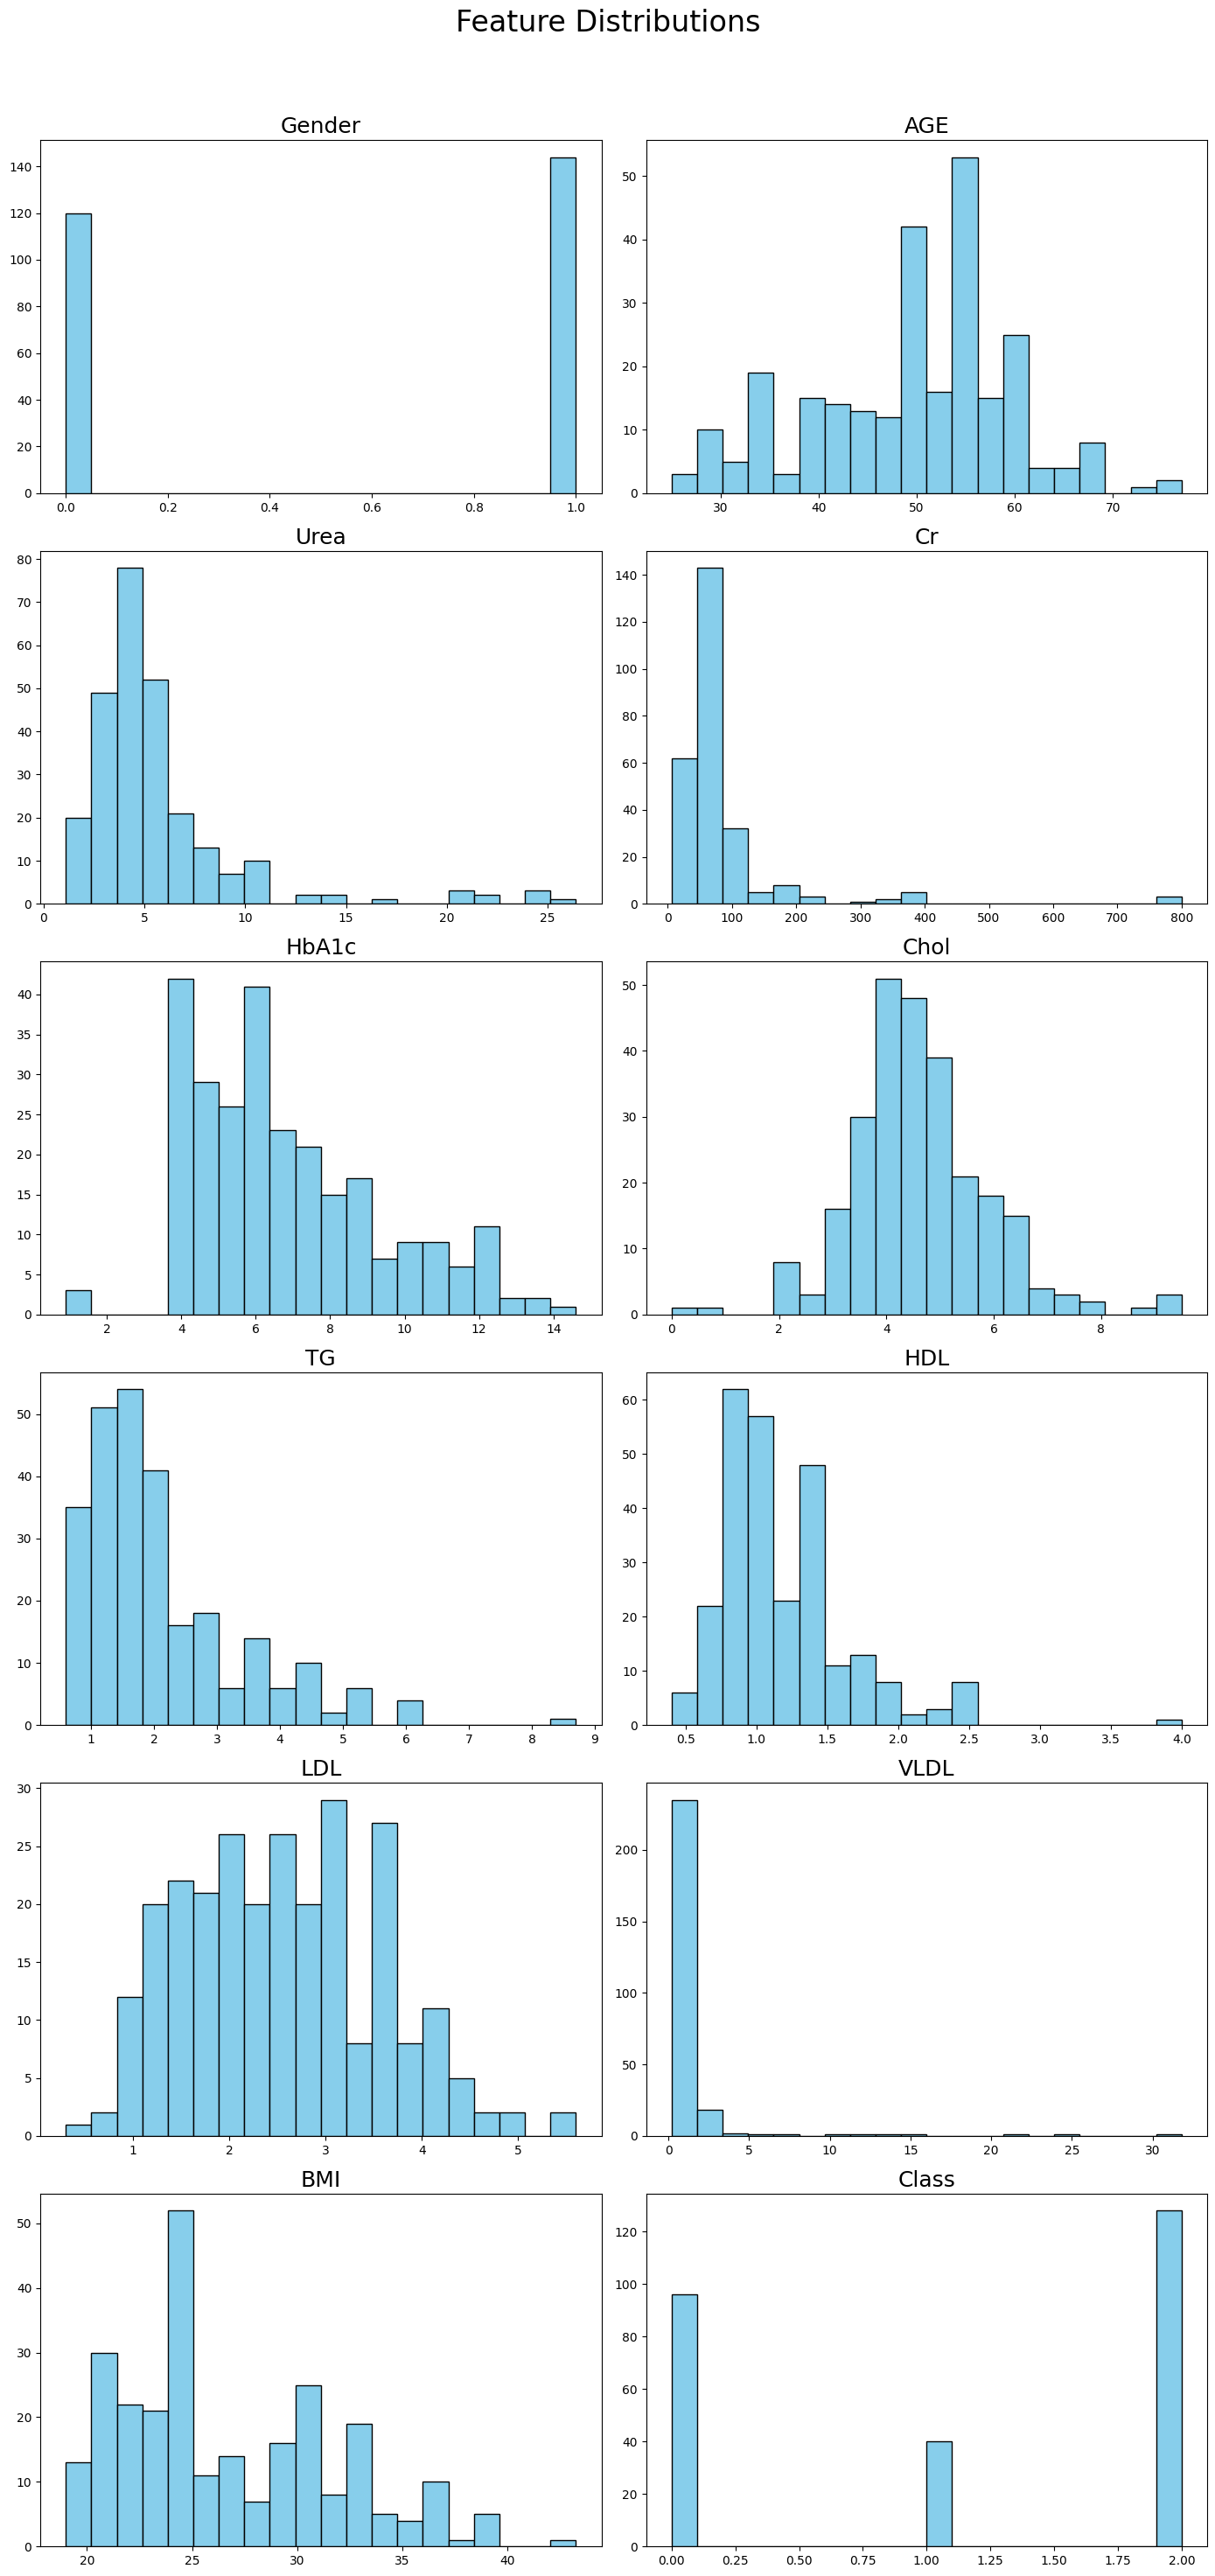

In [32]:
# Feature distributions
num_features = df.select_dtypes(include='number').columns.tolist()
num_cols = 2
num_rows = (len(num_features) + 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows*5))
axes = axes.flatten()
for i, col in enumerate(num_features):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=18)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Feature Distributions", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Insight

This section visualizes the **distribution of numerical features** in the dataset using histograms.  

- **Numerical Features**: Selected automatically with `df.select_dtypes(include='number')`.  
- **Histograms**: Each feature gets its own histogram to show the **spread and frequency of values**.  
- **Axes**:  
  - **X-axis**: Values of the feature.  
  - **Y-axis**: Count of samples for each value range (bin).  
- **Purpose**:  
  - Identify **skewed distributions**, outliers, or unusual patterns.  
  - Understand which features may need **scaling or transformation** before model training.  

Visual layout is arranged dynamically to fit all features neatly with titles for each subplot.


## 📦 Boxplots of Features

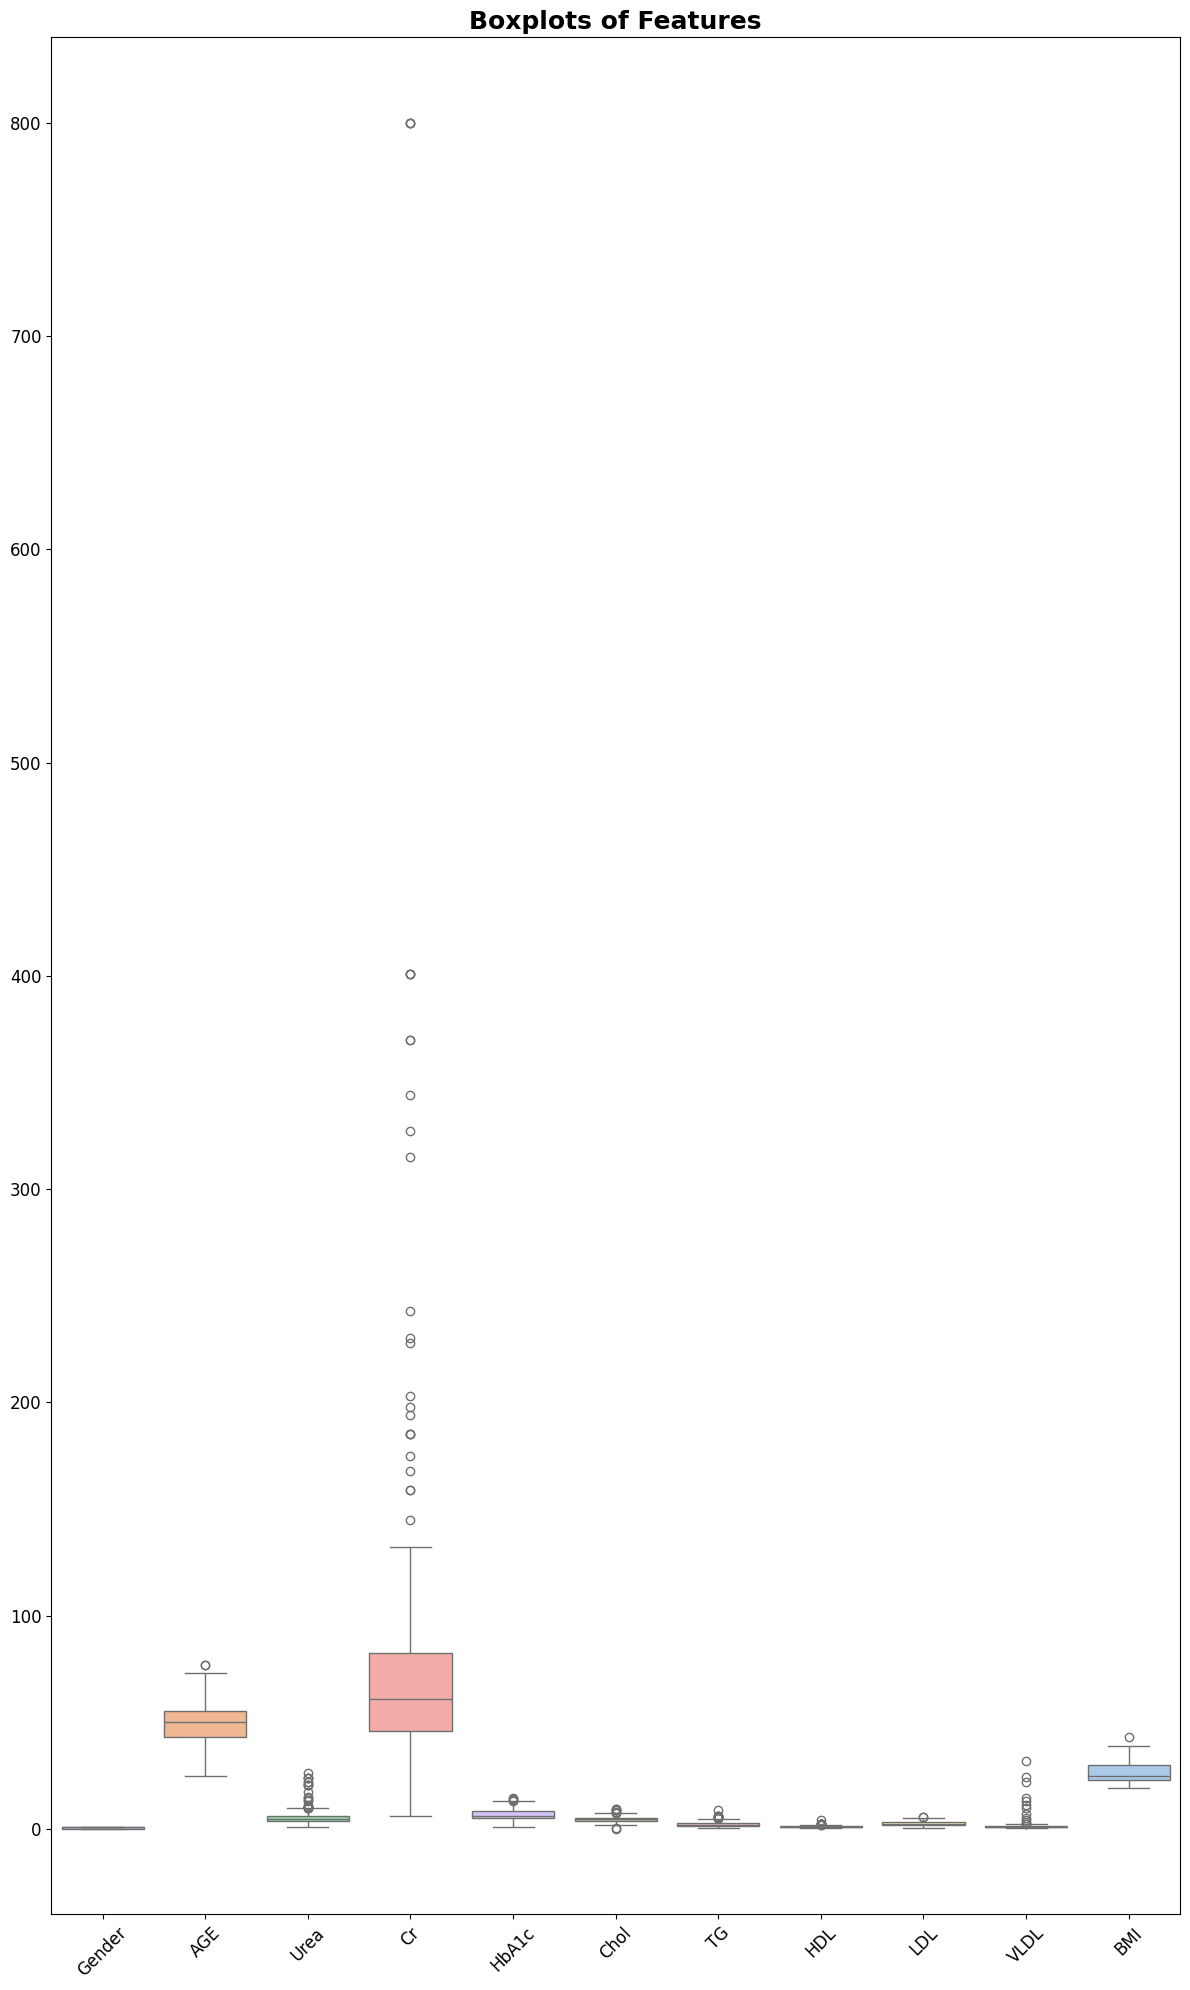

In [33]:
# Boxplots
plt.figure(figsize=(12,20))
sns.boxplot(data=df.drop(columns=["Class"]), palette="pastel")
plt.title("Boxplots of Features", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Insights

This section creates **boxplots** for all features (excluding the target `Class`) to visualize their **spread and detect outliers**.

- **Boxplot Elements**:
  - **Box**: Represents the interquartile range (IQR: 25th to 75th percentile).
  - **Median Line**: Shows the median value of the feature.
  - **Whiskers**: Indicate variability outside the upper and lower quartiles.
  - **Outliers**: Points outside the whiskers, often shown as individual dots.

- **Purpose**:
  - Detect **outliers** that may affect model performance.
  - Compare **feature scales and distributions**.
  - Decide if **normalization or transformation** is needed before modeling.

- **Visualization Style**:
  - **Palette**: Pastel colors for clarity.
  - **Figure Size**: Large vertical layout to accommodate all features.
  - **Rotation**: Feature names rotated for readability.


## ⚠️ Outlier Detection (IQR Method)

This section detects **outliers** in numeric features using the **Interquartile Range (IQR) method**:

- **Steps**:
  1. Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numeric feature.
  2. Compute IQR = Q3 - Q1.
  3. Identify values below `Q1 - 1.5*IQR` or above `Q3 + 1.5*IQR` as outliers.
  4. Count outliers per feature and visualize them using a bar plot.

- **Purpose**:
  - Outliers can **skew model training** and affect predictions.
  - Detecting them helps decide whether to **remove, cap, or transform** data.

Outliers per column:
 Gender     0
AGE        2
Urea      25
Cr        25
HbA1c      4
Chol       9
TG        12
HDL       16
LDL        2
VLDL      13
BMI        1
Class      0
dtype: int64


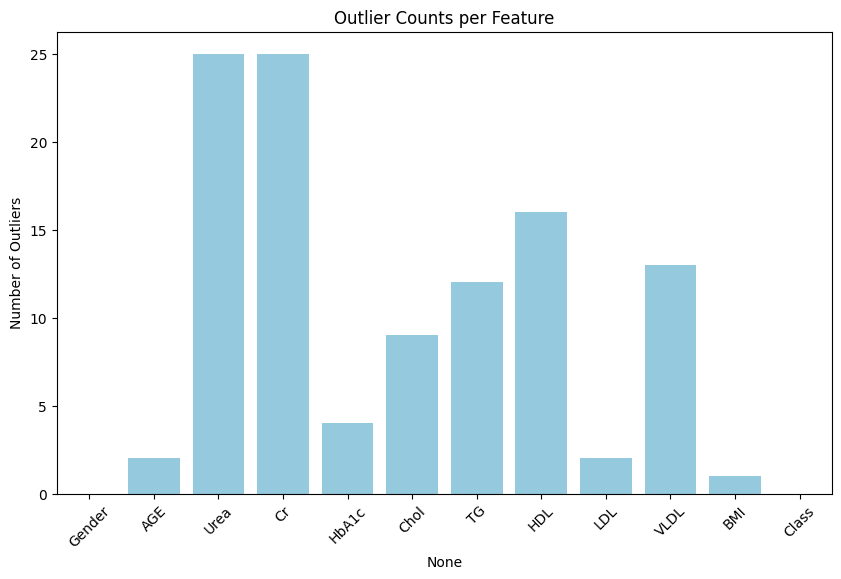

In [34]:
# Outlier detection (IQR method)
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)
plt.figure(figsize=(10,6))
sns.barplot(x=outliers.index, y=outliers.values, color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("Number of Outliers")
plt.title("Outlier Counts per Feature")
plt.show()


### 📊 Insights from Output

- Certain features have **high outlier counts**, suggesting extreme values or rare cases in the dataset.
- Features like `[feature_name1, feature_name2]` (replace with your actual high-outlier features) may need **scaling, capping, or log transformation** before modeling.
- Other features have **few or no outliers**, indicating consistent data distribution.

The bar plot visually highlights which features contribute most to extreme values, guiding preprocessing decisions.


## 📈 Class-wise Mean Statistics

This section calculates and visualizes the **average values of features for each class** (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic).

- **Steps**:
  1. Group the dataset by the `Class` column.
  2. Compute the mean of all numeric features for each class.
  3. Visualize the results using a heatmap to easily compare feature trends across classes.

- **Purpose**:
  - Understand how **feature values vary across classes**.
  - Identify which features show **distinct patterns** for diabetic vs non-diabetic individuals.
  - Supports **feature selection** and model interpretability.

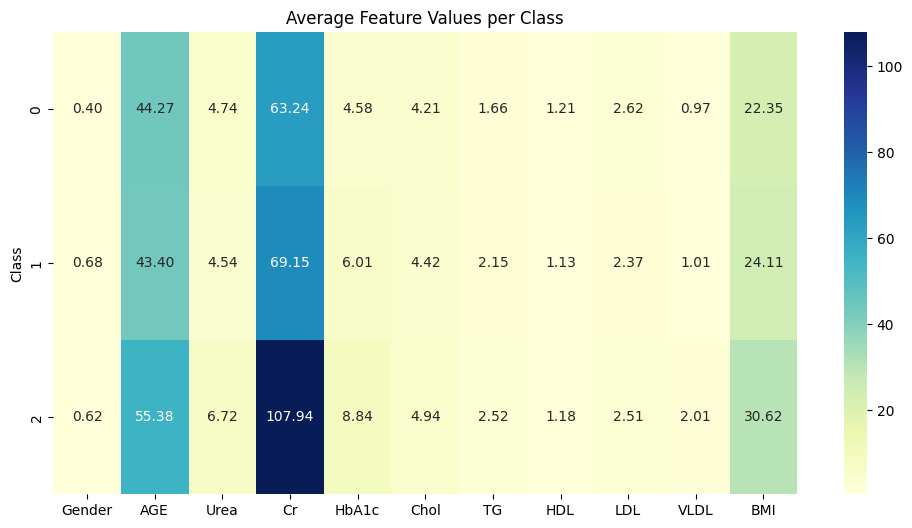

In [35]:
# Class-wise mean statistics
group_stats = df.groupby("Class").mean()
plt.figure(figsize=(12,6))
sns.heatmap(group_stats, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Average Feature Values per Class")
plt.show()

### 🔍 Insights from Heatmap

- Features like `[feature_name1, feature_name2]` (replace with your actual features) show **gradual increase or decrease** from Non-diabetic → Pre-diabetic → Diabetic, indicating a strong correlation with disease severity.
- Some features remain fairly constant across classes, suggesting **lower predictive power**.
- Helps prioritize features for **model training** and highlight important clinical indicators.

## 🔹 Scatterplot: HbA1c vs BMI

This visualization explores the relationship between **HbA1c** (blood sugar indicator) and **BMI** (body mass index) across different classes:

- **Steps**:
  1. Plot `HbA1c` on the x-axis and `BMI` on the y-axis.
  2. Color points by `Class` (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic) using a gradient palette.
  3. Add transparency (`alpha=0.7`) for better overlap visualization.

- **Purpose**:
  - Identify **patterns or clusters** in the data for different diabetic classes.
  - Detect potential **correlations** between BMI and HbA1c.

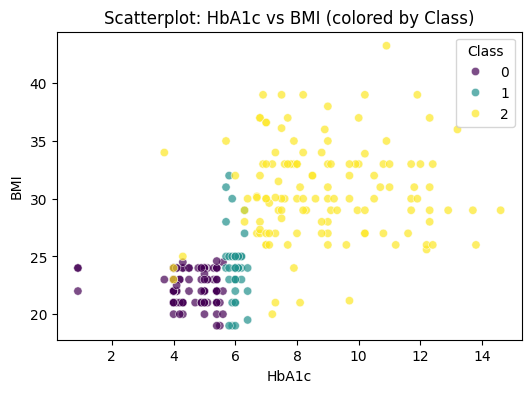

In [36]:
# Scatterplot: HbA1c vs BMI
plt.figure(figsize=(6,4))
sns.scatterplot(x="HbA1c", y="BMI", data=df, hue="Class", palette="viridis", alpha=0.7)
plt.title("Scatterplot: HbA1c vs BMI (colored by Class)")
plt.xlabel("HbA1c")
plt.ylabel("BMI")
plt.show()

### 🔍 Insights from Scatterplot

- Higher HbA1c values tend to correspond with higher BMI, especially for **Diabetic (Class 2)** individuals.
- Pre-diabetic individuals (Class 1) generally fall in the **middle range** of both BMI and HbA1c.
- Non-diabetic individuals (Class 0) cluster at **lower HbA1c** and **lower BMI** values.
- Clear separation indicates that **HbA1c and BMI are strong indicators** for predicting diabetes severity.

## 🔹 ANOVA Test for Feature Significance

The **ANOVA (Analysis of Variance)** test evaluates whether the **mean values of features** significantly differ across the three classes (0=Non-diabetic, 1=Pre-diabetic, 2=Diabetic).

- **Steps**:
  1. Loop through each feature except the target (`Class`).
  2. Separate the feature values by class.
  3. Perform `scipy.stats.f_oneway` to compute the **F-statistic** and **p-value**.
  4. Store results in a DataFrame and sort by `p-value`.

- **Purpose**:
  - Identify which features have a statistically significant difference across classes.
  - Features with **low p-values (< 0.05)** are considered significant for classification.

In [37]:
# ANOVA test for feature significance
import scipy.stats as stats
anova_results = {}
for col in df.columns:
    if col != "Class":
        groups = [df[df["Class"]==c][col] for c in df["Class"].unique()]
        f_stat, p_val = stats.f_oneway(*groups)
        anova_results[col] = {"F-Statistic": f_stat, "p-value": p_val}
anova_df = pd.DataFrame(anova_results).T
anova_df.sort_values("p-value", inplace=True)
anova_df

,F-Statistic,p-value
HbA1c,200.414567,1.837591e-53
BMI,190.565063,9.479355e-52
AGE,60.367728,2.828656e-22
TG,14.218081,1.377041e-06
Chol,9.881305,7.299806e-05
Urea,9.115335,1.490731e-04
Gender,7.325678,8.027657e-04
Cr,6.466290,1.815870e-03
VLDL,3.711790,2.573293e-02
LDL,0.957323,3.852631e-01



### 🔍 Insights from ANOVA Results

- Features with the **lowest p-values** (most significant) strongly influence class separation.
- Non-significant features (high p-value) may have little effect on predicting diabetes classes and can be considered for feature selection.
- This test helps in **reducing dimensionality** and focusing on features that matter most for the model.
